# 1 Ajustement d’images par correction gamma

In [81]:
from PIL  import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [82]:
imgGot = np.array(Image.open('images/got.jpg'), dtype=np.float)

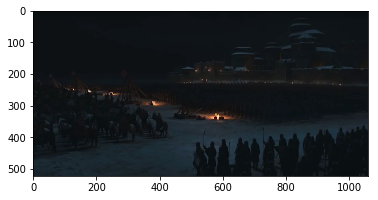

In [83]:

def display(img):
    tod = np.array(img,dtype='uint16')
    plt.imshow(tod)
    
display(imgGot)

In [84]:
imgLowGamma = np.power(imgGot[...,], [0.1, .5, .9])
imgHighGamma = np.power(imgGot[...,], [2.0, 3.0, 4.0])

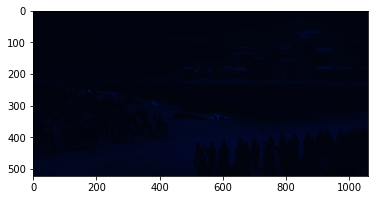

In [85]:
display(imgLowGamma)

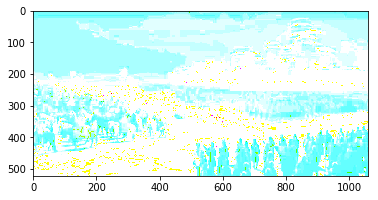

In [86]:
display(imgHighGamma)

# 2 Filtrage d’images

In [130]:
def Gaussian(i,j, size, sigma):
    i = float(i)
    j = float(j)
    size = float(size)
    sigma = float(sigma)
    x = abs((i - size / 2) / size) * 2
    y = abs((j - size / 2) / size) * 2
    m1 = 1.0 / (2 * math.pi * pow(sigma , 2))
    m2 = (pow(x, 2) + pow(y, 2)) * (-1 / (2 * math.pi * pow(sigma, 2)))

    return m1 * math.exp(m2)
    
    
def gaussian_kernel(sigma, size):
    res = [] 
    for i in range(size):
        tab = []
        for j in range(size):
            tab.append(Gaussian(i,j,size, sigma))
        res.append(tab)
    return np.array(res)
                                  
    

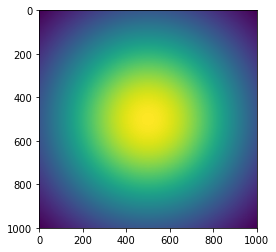

In [131]:
plt.imshow(gaussian_kernel(0.4,1000))

In [133]:
def mean_kernel(size):
    return np.full((size,size), 1)

In [168]:
def apply_median_kernel(array2d, kernelsize):
    resarray = np.full(array2d.shape, -1)
    height = len(array2d)
    width = len(array2d[0])
    kern_div_2 = kernelsize / 2.0
    for i in range(height):
        for j in range(width):
            mini = int(max(i - kern_div_2, 0))
            maxi = int(min(i + kern_div_2, height))
            minj = int(max(j - kern_div_2, 0))
            maxj = int(min(j + kern_div_2, width))
            subarr = np.array(array2d[mini:maxi, minj:maxj]).flatten()
            subarr = np.sort(subarr)
            mid = int(len(subarr) / 2.0)
            median = subarr[mid]
            resarray[i,j] = median
    return resarray
                    
                    

    

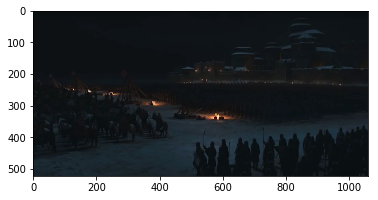

In [178]:
display(imgGot)

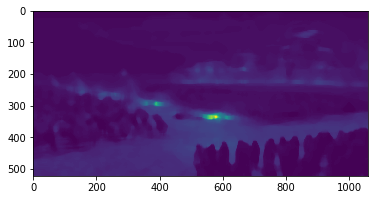

In [183]:
medianKernel = apply_median_kernel(imgGot[...,0],20)
plt.imshow(medianKernel)

In [190]:
imgBoat = np.array(Image.open('images/boat512.gif'))

In [195]:
def apply_gauss_kernel(img, size):
    shaape = img.shape
    return np.convolve(img.flatten(),gaussian_kernel(1,size).flatten(), mode='same').reshape(shaape)
    


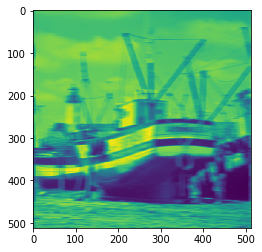

In [201]:
plt.imshow(apply_gauss_kernel(imgBoat, 4))